# Classe Parametros

A classe `Parametros` é uma parte essencial do código Python fornecido e desempenha um papel fundamental no armazenamento e validação de parâmetros usados nas simulações do sistema. Ela é projetada para garantir que os parâmetros fornecidos sejam válidos e pode ser usada para configurar as propriedades do sistema. Abaixo estão as principais características da classe `Parametros`:

## Construtor - `__init__`

O construtor da classe `Parametros` é chamado quando um objeto dessa classe é criado. Ele aceita vários parâmetros que representam os atributos do sistema que precisam ser definidos. Esses parâmetros são:

- `num_segmentos`: O número de segmentos no sistema.
- `tensao_medida`: A tensão medida no sistema.
- `coef_erro`: O coeficiente de erro do sistema.
- `desvio_ruido`: O desvio padrão do ruído no sistema.
- `forca`: A força aplicada no sistema.
- `kt`: O coeficiente `kt` usado nas simulações.
- `kp`: O coeficiente `kp` usado nas simulações.
- `kf`: O coeficiente `kf` usado nas simulações.
- `dia_interno`: O diâmetro interno do sistema.
- `dia_externo`: O diâmetro externo do sistema.

No construtor, esses parâmetros são validados usando o método `validar_parametros` e, se forem válidos, são usados para configurar os atributos da classe. Se algum dos parâmetros for inválido, uma exceção `ValueError` será lançada.

## Métodos

### `validar_parametros`

Este método é responsável por validar os parâmetros `num_segmentos` e `tensao_medida`. A validação é feita verificando se ambos os valores são maiores que zero. Se algum dos valores não atender a essa condição, a validação falha e a classe lançará uma exceção `ValueError`.

### `set_parametros`

Este método é usado para definir os atributos da classe com base nos parâmetros fornecidos no construtor. Após a validação bem-sucedida dos parâmetros, este método atribui os valores aos atributos correspondentes da classe.

## Utilização

A classe `Parametros` é usada para criar um objeto que encapsula os parâmetros necessários para as simulações do sistema. O objeto pode então ser passado como argumento para outras funções e métodos no código para conduzir as simulações e análises.

A criação de uma classe dedicada para armazenar esses parâmetros torna o código mais organizado e mais fácil de manter, pois centraliza a lógica de validação e configuração dos parâmetros do sistema.

```python
# Exemplo de uso da classe Parametros
parametros = Parametros(num_segmentos=10, tensao_medida=150.0, coef_erro=0.0, desvio_ruido=1.0, forca=500.0, kt=0.0002, kp=0.00005, kf=0.001, dia_interno=0.35, dia_externo=0.45)


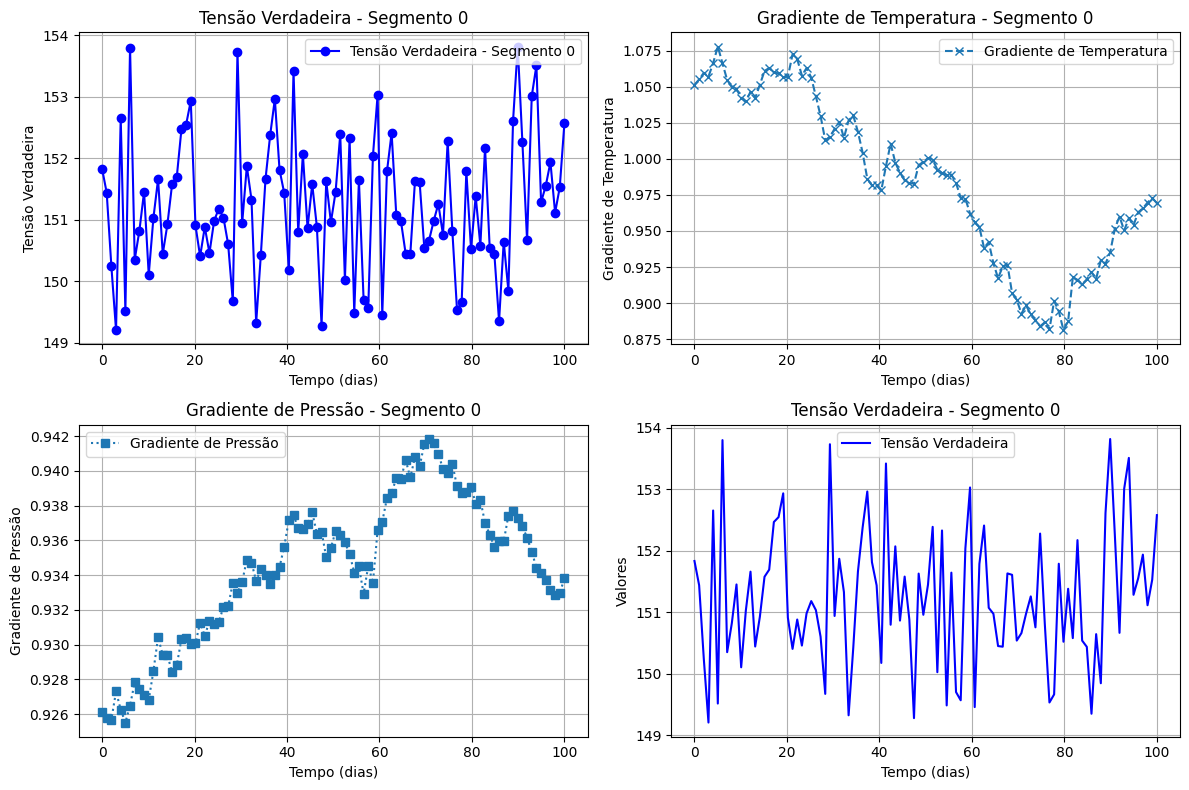

Relatório do Segmento 0:

Média da Tensão Verdadeira: 151.23486079153727
Desvio Padrão da Tensão Verdadeira: 1.0877483225495181
Valor Mínimo da Tensão Verdadeira: 149.20956229373687
Valor Máximo da Tensão Verdadeira: 153.8138590017335
Mediana da Tensão Verdadeira: 151.09386793487855
Percentil 25 da Tensão Verdadeira: 150.50636459411882
Percentil 75 da Tensão Verdadeira: 151.8417937743709
Amplitude da Tensão Verdadeira: 4.604296707996639
Tempo do Valor Máximo da Tensão: 89 dias
Taxa Máxima de Variação da Tensão: 4.2778158780047875 por dia
Tempo da Taxa Máxima de Variação: 5 dias


In [50]:
import matplotlib.pyplot as plt
import numpy as np

class Parametros:
    def __init__(self, num_segmentos, tensao_medida, coef_erro, desvio_ruido, forca, kt, kp, kf, dia_interno, dia_externo):
        if self.validar_parametros(num_segmentos, tensao_medida):
            self.set_parametros(num_segmentos, tensao_medida, coef_erro, desvio_ruido, forca, kt, kp, kf, dia_interno, dia_externo)
        else:
            raise ValueError("Parâmetros inválidos. Certifique-se de que num_segmentos seja maior que zero e tensao_medida seja positiva.")

    def validar_parametros(self, num_segmentos, tensao_medida):
        return num_segmentos > 0 and tensao_medida > 0

    def set_parametros(self, num_segmentos, tensao_medida, coef_erro, desvio_ruido, forca, kt, kp, kf, dia_interno, dia_externo):
        self.num_segmentos = num_segmentos
        self.tensao_medida = tensao_medida
        self.coef_erro = coef_erro
        self.desvio_ruido = desvio_ruido
        self.forca = forca
        self.kt = kt
        self.kp = kp
        self.kf = kf
        self.dia_interno = dia_interno
        self.dia_externo = dia_externo

def calcular_tensao_verdadeira(tensao, parametros, grad_temp, grad_pressao):
    # Erro gaussiano com dependência temporal
    erro_temporal = np.random.normal(0, parametros.coef_erro * tensao, len(grad_temp))
    erro = erro_temporal + parametros.coef_erro * np.random.normal(0, tensao, len(grad_temp))

    # Modelagem mais complexa de compensação de temperatura e pressão
    temp_comp = parametros.kt * np.convolve(grad_temp, grad_temp, 'same') * tensao
    pressao_comp = parametros.kp * np.convolve(grad_pressao, grad_pressao, 'same') * tensao

    # Componente de força não-linear
    forca_comp = parametros.kf * parametros.forca * (1 + np.sin(grad_temp))

    # Ruído não-linear
    ruido = np.random.normal(0, parametros.desvio_ruido, len(grad_temp)) + 0.01 * np.sin(0.1 * grad_temp)

    # Tensão verdadeira resultante
    tensao_verdadeira = tensao - erro + temp_comp + pressao_comp + forca_comp + ruido
    return tensao_verdadeira

def criar_gradientes(num_segmentos, dias):
    gradientes_temp = []
    gradientes_pressao = []

    for i in range(num_segmentos):
        tempo = np.linspace(0, dias, dias)
        
        # Simulando gradientes de temperatura
        grad_temp = np.zeros(dias)
        grad_temp[0] = np.random.uniform(0.9, 1.1)  # Valor inicial
        for t in range(1, dias):
            grad_temp[t] = grad_temp[t - 1] + np.random.normal(0, 0.01)  # Pequenas variações ao longo do tempo

        # Simulando gradientes de pressão
        grad_pressao = np.zeros(dias)
        grad_pressao[0] = np.random.uniform(0.9, 1.1)  # Valor inicial
        for t in range(1, dias):
            grad_pressao[t] = grad_pressao[t - 1] + np.random.normal(0, 0.001)  # Pequenas variações ao longo do tempo

        gradientes_temp.append(grad_temp)
        gradientes_pressao.append(grad_pressao)

    return gradientes_temp, gradientes_pressao

from scipy.optimize import curve_fit

# Função não linear para ajuste
def funcao_nao_linear(tempo, a, b, c):
    return a * np.sin(b * tempo) + c

def criar_riser_avancado(parametros, gradientes_temp, gradientes_pressao, segmento_selecionado):
    tensao_cabeca = []

    grad_temp = gradientes_temp[segmento_selecionado]
    grad_pressao = gradientes_pressao[segmento_selecionado]

    tempo = np.linspace(0, len(grad_temp), len(grad_temp))  # Define tempo based on the length of the gradient data

    # Ajuste uma função não linear aos gradientes
    popt, _ = curve_fit(funcao_nao_linear, tempo, grad_temp)
    a, b, c = popt

    # Use os parâmetros ajustados para calcular a tensao verdadeira
    tensao_verdadeira = calcular_tensao_verdadeira(parametros.tensao_medida, parametros, a * grad_temp, grad_pressao)
    tensao_cabeca.append(tensao_verdadeira)

    return tensao_cabeca

def criar_visualizacoes_tempo(tensao_cabeca, gradientes_temp, gradientes_pressao, dias, segmento_selecionado, exibir_grad_temp=True, exibir_grad_pressao=True):
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))

    tempo_dias = np.linspace(0, dias, dias)

    axs[0, 0].plot(tempo_dias, tensao_cabeca[segmento_selecionado], label=f'Tensão Verdadeira - Segmento {segmento_selecionado}', color='blue', linestyle='-', marker='o')
    axs[0, 0].set_title(f"Tensão Verdadeira - Segmento {segmento_selecionado}")

    axs[0, 0].set_xlabel("Tempo (dias)")
    axs[0, 0].set_ylabel("Tensão Verdadeira")
    axs[0, 0].grid(True)
    axs[0, 0].legend()

    if exibir_grad_temp:
        axs[0, 1].plot(tempo_dias, gradientes_temp[segmento_selecionado], label=f'Gradiente de Temperatura', linestyle='--', marker='x')
        axs[0, 1].set_title(f"Gradiente de Temperatura - Segmento {segmento_selecionado}")
        axs[0, 1].set_xlabel("Tempo (dias)")
        axs[0, 1].set_ylabel("Gradiente de Temperatura")
        axs[0, 1].grid(True)
        axs[0, 1].legend()

    if exibir_grad_pressao:
        axs[1, 0].plot(tempo_dias, gradientes_pressao[segmento_selecionado], label=f'Gradiente de Pressão', linestyle=':', marker='s')
        axs[1, 0].set_title(f"Gradiente de Pressão - Segmento {segmento_selecionado}")
        axs[1, 0].set_xlabel("Tempo (dias)")
        axs[1, 0].set_ylabel("Gradiente de Pressão")
        axs[1, 0].grid(True)
        axs[1, 0].legend()

    axs[1, 1].plot(tempo_dias, tensao_cabeca[segmento_selecionado], label=f'Tensão Verdadeira', color='blue', linestyle='-')
    axs[1, 1].set_title(f"Tensão Verdadeira - Segmento {segmento_selecionado}")
    axs[1, 1].set_xlabel("Tempo (dias)")
    axs[1, 1].set_ylabel("Valores")
    axs[1, 1].grid(True)
    axs[1, 1].legend()

    plt.tight_layout()
    plt.show()

def gerar_relatorio_completo(tensao_cabeca, segmento_selecionado):
    segmento = tensao_cabeca[segmento_selecionado]
    tempo = np.arange(len(segmento))

    media_tensao = np.mean(segmento)
    desvio_padrao_tensao = np.std(segmento)
    valor_minimo_tensao = np.min(segmento)
    valor_maximo_tensao = np.max(segmento)
    mediana_tensao = np.median(segmento)
    percentil_25 = np.percentile(segmento, 25)
    percentil_75 = np.percentile(segmento, 75)
    amplitude_tensao = valor_maximo_tensao - valor_minimo_tensao

    # Encontre o ponto de tempo onde ocorre o valor máximo da tensão
    tempo_max_tensao = tempo[np.argmax(segmento)]
    
    # Calcule a taxa de variação da tensão
    taxa_variacao = np.diff(segmento) / np.diff(tempo)
    taxa_max_variacao = np.max(taxa_variacao)
    tempo_max_variacao = tempo[np.argmax(taxa_variacao)]

    print(f"Relatório do Segmento {segmento_selecionado}:\n")
    print(f"Média da Tensão Verdadeira: {media_tensao}")
    print(f"Desvio Padrão da Tensão Verdadeira: {desvio_padrao_tensao}")
    print(f"Valor Mínimo da Tensão Verdadeira: {valor_minimo_tensao}")
    print(f"Valor Máximo da Tensão Verdadeira: {valor_maximo_tensao}")
    print(f"Mediana da Tensão Verdadeira: {mediana_tensao}")
    print(f"Percentil 25 da Tensão Verdadeira: {percentil_25}")
    print(f"Percentil 75 da Tensão Verdadeira: {percentil_75}")
    print(f"Amplitude da Tensão Verdadeira: {amplitude_tensao}")
    print(f"Tempo do Valor Máximo da Tensão: {tempo_max_tensao} dias")
    print(f"Taxa Máxima de Variação da Tensão: {taxa_max_variacao} por dia")
    print(f"Tempo da Taxa Máxima de Variação: {tempo_max_variacao} dias")

# Parâmetros ajustados para Média, Desvio Padrão, Valor Mínimo e Valor Máximo personalizados
parametros = Parametros(
    num_segmentos=10, 
    tensao_medida=150.0, 
    coef_erro=0.0, 
    desvio_ruido=1.0, 
    forca=500.0, 
    kt=0.0002, 
    kp=0.00005, 
    kf=0.001, 
    dia_interno=0.35, 
    dia_externo=0.45
)

# Cria gradientes para cada segmento (exemplo)
dias = 100
gradientes_temp, gradientes_pressao = criar_gradientes(parametros.num_segmentos, dias)

# Cria e plota os dados para o Segmento 1 (exemplo)
segmento_selecionado = 0  # Escolha o segmento desejado

# Define o tempo para o segmento selecionado
tempo = np.linspace(0, dias, len(gradientes_temp[segmento_selecionado]))

tensao_cabeca = criar_riser_avancado(parametros, gradientes_temp, gradientes_pressao, segmento_selecionado)

# Crie as visualizações do segmento
criar_visualizacoes_tempo(tensao_cabeca, gradientes_temp, gradientes_pressao, dias, segmento_selecionado)

# Gere um relatório completo para o segmento
gerar_relatorio_completo(tensao_cabeca, segmento_selecionado)

# Classe EfeitosTensaoRiser

A classe `EfeitosTensaoRiser` é projetada para modelar vários efeitos que afetam a tensão em um riser (um componente usado em sistemas de engenharia submarina) ao longo do tempo. Ela contém métodos para simular diferentes efeitos, como desgaste de material, corrosão, sobrecarga e variação sazonal, que podem ser aplicados a uma série de tensão no riser.

## Construtor - `__init__`

O construtor da classe `EfeitosTensaoRiser` é responsável por inicializar um objeto dessa classe. Ele requer dois parâmetros:

- `tensao_cabeca`: Uma série temporal que representa a tensão na cabeça do riser.
- `segmento_selecionado`: Um índice que indica o segmento do riser que se deseja analisar.

Esses parâmetros são necessários para permitir a aplicação dos efeitos à tensão do riser em um segmento específico.

## Métodos

A classe `EfeitosTensaoRiser` possui vários métodos que permitem simular efeitos específicos. Aqui estão os principais métodos:

### `efeito_desgaste_material`

Este método simula o efeito de desgaste de material no riser. Ele aceita três parâmetros:

- `taxa_desgaste`: A taxa de desgaste do material.
- `variacao_temporal`: A variação temporal usada na simulação.
- `fator_aleatorio`: Um fator aleatório aplicado ao efeito.

### `efeito_corrosao`

Este método modela o efeito de corrosão no riser. Ele leva em consideração três parâmetros:

- `taxa_corrosao`: A taxa de corrosão.
- `variacao_temporal`: A variação temporal usada na simulação.
- `fator_aleatorio`: Um fator aleatório aplicado ao efeito.

### `efeito_sobrecarga`

Este método simula o efeito de sobrecarga no riser. Ele requer três parâmetros:

- `fator_sobrecarga`: O fator de sobrecarga.
- `variacao_temporal`: A variação temporal usada na simulação.
- `fator_aleatorio`: Um fator aleatório aplicado ao efeito.

### `efeito_variacao_sazonal`

Este método modela o efeito de variação sazonal no riser. Ele aceita quatro parâmetros:

- `amplitude_variacao_sazonal`: A amplitude da variação sazonal.
- `periodo_variacao_sazonal`: O período da variação sazonal.
- `variacao_temporal`: A variação temporal usada na simulação.
- `fator_aleatorio`: Um fator aleatório aplicado ao efeito.

## Métodos Privados

A classe também contém um método privado `_efeito_generico`, que é usado internamente pelos métodos públicos para aplicar os efeitos aos dados da tensão do riser. Ele é responsável por calcular e aplicar os efeitos com base nos parâmetros fornecidos.

## Utilização

Para usar a classe `EfeitosTensaoRiser`, você deve criar uma instância da classe e, em seguida, chamar os métodos específicos para simular os efeitos desejados. Os métodos retornarão a série temporal da tensão com os efeitos aplicados.

Exemplo de uso:

```python
# Criando uma instância da classe EfeitosTensaoRiser
efeitos_riser = EfeitosTensaoRiser(tensao_cabeca, segmento_selecionado)

# Aplicando o efeito de desgaste de material
tensao_com_desgaste = efeitos_riser.efeito_desgaste_material(taxa_desgaste, variacao_temporal, fator_aleatorio)


In [51]:
import numpy as np

class EfeitosTensaoRiser:
    def __init__(self, tensao_cabeca, segmento_selecionado):
        self.tensao_cabeca = tensao_cabeca
        self.segmento_selecionado = segmento_selecionado

    def efeito_desgaste_material(self, taxa_desgaste, variacao_temporal, fator_aleatorio):
        return self._efeito_generico(taxa_desgaste, variacao_temporal, fator_aleatorio, np.sin)

    def efeito_corrosao(self, taxa_corrosao, variacao_temporal, fator_aleatorio):
        return self._efeito_generico(taxa_corrosao, variacao_temporal, fator_aleatorio, np.cos, quadratic=True)

    def efeito_sobrecarga(self, fator_sobrecarga, variacao_temporal, fator_aleatorio):
        return self._efeito_generico(fator_sobrecarga, variacao_temporal, fator_aleatorio, np.sin)

    def efeito_variacao_sazonal(self, amplitude_variacao_sazonal, periodo_variacao_sazonal, variacao_temporal, fator_aleatorio):
        return self._efeito_generico(amplitude_variacao_sazonal, periodo_variacao_sazonal, fator_aleatorio, np.cos, seasonal=True)

    def _efeito_generico(self, taxa, variacao_temporal, fator_aleatorio, funcao, quadratic=False, seasonal=False):
        segmento = self.tensao_cabeca[self.segmento_selecionado]
        tempo = np.arange(len(segmento))
        termo_temporal = funcao(variacao_temporal * tempo)
        if seasonal:
            termo_temporal *= np.sin(2 * np.pi * tempo / periodo_variacao_sazonal)
        termo_aleatorio = np.random.normal(0, 0.1, len(segmento))
        efeito = termo_temporal + fator_aleatorio * termo_aleatorio
        if quadratic:
            efeito *= taxa * (tempo**2)
        else:
            efeito *= taxa
        return segmento - efeito

# Exemplo de uso:
# tensao_cabeca e segmento_selecionado devem ser definidos antes de criar uma instância de EfeitosTensaoRiser.

efeitos_riser = EfeitosTensaoRiser(tensao_cabeca, segmento_selecionado)

# Aplicação dos Efeitos na Tensão do Riser

Neste código, é feita a aplicação de vários efeitos na tensão de um riser (um componente de sistemas submarinos) e o resultado é obtido para um segmento específico. Vamos explicar o código passo a passo:

## Parâmetros de Variação Temporal

- `variacao_temporal`: Representa a variação temporal usada nos cálculos. É um valor constante de 0.1.
- `fator_aleatorio`: Representa um fator aleatório que é aplicado nos cálculos. Pode ser ajustado conforme necessário.

## Valores dos Parâmetros para Cada Efeito

- `taxa_desgaste`: A taxa de desgaste de material para simulação.
- `taxa_corrosao`: A taxa de corrosão para simulação.
- `fator_sobrecarga`: O fator de sobrecarga para simulação.
- `amplitude_variacao_sazonal`: A amplitude da variação sazonal para simulação.
- `periodo_variacao_sazonal`: O período da variação sazonal para simulação.

## Escolha do Segmento

- `segmento_selecionado`: Um índice que indica o segmento específico do riser que será analisado (no código, é escolhido o Segmento 1).

## Criação da Instância da Classe EfeitosTensaoRiser

- `efeitos_riser`: É criada uma instância da classe `EfeitosTensaoRiser`, que é usada para aplicar os efeitos na tensão do riser.

## Função para Aplicar os Efeitos com Variação Temporal

- `aplicar_efeito(efeito, *params)`: É definida uma função que recebe um efeito (um dos métodos da classe `EfeitosTensaoRiser`) e seus parâmetros. A função aplica o efeito com a `variacao_temporal` e o `fator_aleatorio` especificados.

## Aplicação dos Efeitos

- Os quatro principais efeitos são aplicados ao segmento selecionado, usando a função `aplicar_efeito`. Os efeitos são:
  - `efeitos_riser.efeito_desgaste_material`: Aplicação do efeito de desgaste de material com os parâmetros especificados.
  - `efeitos_riser.efeito_corrosao`: Aplicação do efeito de corrosão com os parâmetros especificados.
  - `efeitos_riser.efeito_sobrecarga`: Aplicação do efeito de sobrecarga com os parâmetros especificados.
  - `efeitos_riser.efeito_variacao_sazonal`: Aplicação do efeito de variação sazonal com os parâmetros especificados.

## Resultados

- Os segmentos resultantes após a aplicação de cada efeito são armazenados nas variáveis `segmento_desgastado`, `segmento_corroído`, `segmento_sobrecarregado` e `segmento_com_variacao_sazonal`.

O código permite simular e analisar o efeito de desgaste de material, corrosão, sobrecarga e variação sazonal na tensão do riser para um segmento específico. É uma demonstração prática de como a classe `EfeitosTensaoRiser` pode ser usada para modelar e analisar esses efeitos. Dependendo das variáveis e dos valores dos parâmetros, você pode ajustar a simulação conforme necessário para representar cenários específicos.


In [52]:
# Parâmetros para a variação temporal
variacao_temporal = 0.1
fator_aleatorio = 0.2  # Você pode usar qualquer valor apropriado

# Valores dos parâmetros para cada efeito
taxa_desgaste = 0.02
taxa_corrosao = 0.05
fator_sobrecarga = 10.0
amplitude_variacao_sazonal = 5.0
periodo_variacao_sazonal = 30

# Escolha o segmento a ser analisado (Segmento 1)
segmento_selecionado = 0

# Criar uma instância da classe EfeitosTensaoRiser
efeitos_riser = EfeitosTensaoRiser(tensao_cabeca, segmento_selecionado)

# Função para aplicar os efeitos com variação temporal
def aplicar_efeito(efeito, *params):
    return efeito(*params, variacao_temporal, fator_aleatorio)

# Aplicar os efeitos com variação temporal
segmento_desgastado = aplicar_efeito(efeitos_riser.efeito_desgaste_material, taxa_desgaste)
segmento_corroído = aplicar_efeito(efeitos_riser.efeito_corrosao, taxa_corrosao)
segmento_sobrecarregado = aplicar_efeito(efeitos_riser.efeito_sobrecarga, fator_sobrecarga)
segmento_com_variacao_sazonal = aplicar_efeito(efeitos_riser.efeito_variacao_sazonal, amplitude_variacao_sazonal, periodo_variacao_sazonal)

# Verificar o segmento resultante (Segmento 1)
# print("Segmento 1 - Desgastado:", segmento_desgastado)
# print("Segmento 1 - Corroído:", segmento_corroído)
# print("Segmento 1 - Sobrecarregado:", segmento_sobrecarregado)
# print("Segmento 1 - Variação Sazonal:", segmento_com_variacao_sazonal)


# Geração de Gráficos dos Segmentos do Riser

Neste código, é criado um conjunto de gráficos para visualizar os diferentes segmentos do riser após a aplicação dos efeitos de desgaste de material, corrosão, sobrecarga e variação sazonal. Vamos explicar o código passo a passo:

## Definição de Títulos e Cores dos Segmentos

- A variável `segmentos` é um dicionário que mapeia o título de cada segmento (por exemplo, "Segmento Desgastado") à tupla contendo os dados do segmento e a cor para representá-lo no gráfico.

## Criação da Grade de Subtramas

- É criada uma figura (`fig`) contendo uma grade 2x2 de subtramas usando `plt.subplots(2, 2, figsize=(12, 8))`. Isso significa que serão gerados quatro gráficos organizados em uma grade 2x2.

## Loop Através dos Segmentos e Plotagem

- É feito um loop através do dicionário `segmentos`, que contém os títulos, dados e cores de cada segmento.
- Para cada segmento, um gráfico é plotado em uma subtrama da grade:
  - `ax.plot(dados, label=titulo, color=cor)` é usado para plotar os dados do segmento com um rótulo (título) e uma cor específica.
  - `ax.set_title(titulo)` define o título do gráfico com base no segmento.
  - `ax.set_xlabel('Tempo')` e `ax.set_ylabel('Tensão Verdadeira')` definem os rótulos dos eixos x e y.
  - `ax.grid(True)` adiciona uma grade ao gráfico.
  - `ax.legend()` adiciona uma legenda ao gráfico para indicar qual segmento está sendo representado.

## Ajuste do Layout e Espaçamento

- `plt.subplots_adjust(...)` é usado para ajustar o layout e o espaçamento dos gráficos, definindo margens e espaçamento entre eles.

## Mostrar os Gráficos

- `plt.show()` é usado para exibir os gráficos na tela.

O código gera uma visualização clara dos quatro segmentos do riser, cada um representado com sua cor correspondente e título. Isso permite a comparação visual dos efeitos dos diferentes cenários nos segmentos. Você pode ajustar o código para incluir ou modificar segmentos e cenários conforme necessário para suas análises.


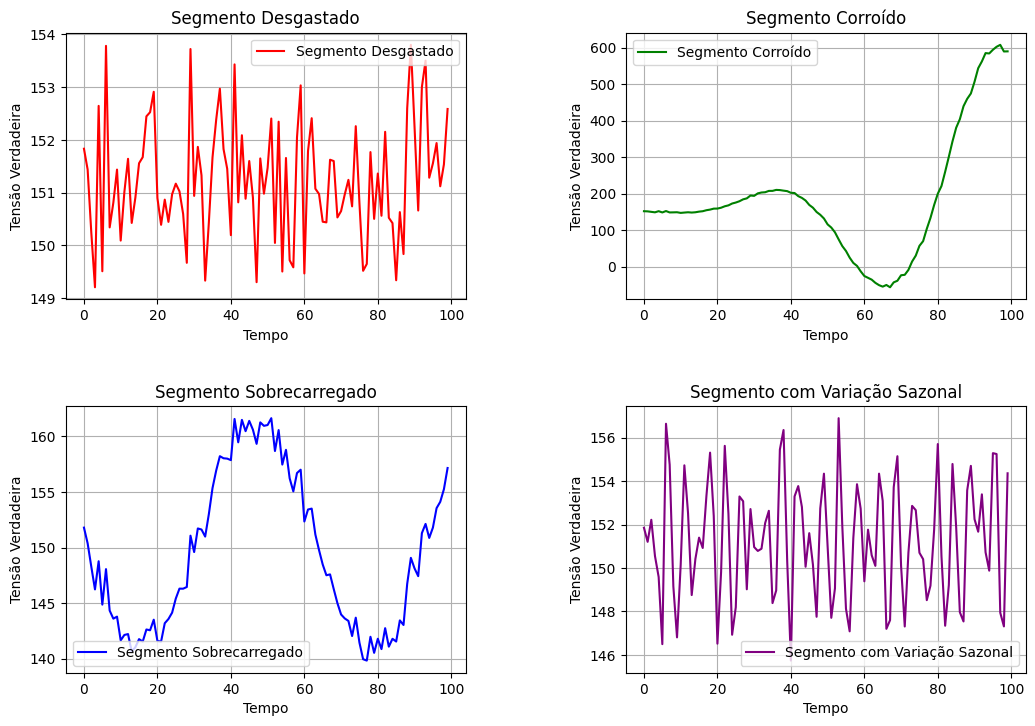

In [53]:
import matplotlib.pyplot as plt

# Títulos e cores dos segmentos
segmentos = {
    'Segmento Desgastado': (segmento_desgastado, 'red'),
    'Segmento Corroído': (segmento_corroído, 'green'),
    'Segmento Sobrecarregado': (segmento_sobrecarregado, 'blue'),
    'Segmento com Variação Sazonal': (segmento_com_variacao_sazonal, 'purple')
}

# Crie uma grade 2x2 de subtramas
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Loop através dos segmentos e plote cada um
for (titulo, (dados, cor), ax) in zip(segmentos.keys(), segmentos.values(), axs.flat):
    ax.plot(dados, label=titulo, color=cor)
    ax.set_title(titulo)
    ax.set_xlabel('Tempo')
    ax.set_ylabel('Tensão Verdadeira')
    ax.grid(True)
    ax.legend()

# Ajuste fino do layout e espaçamento
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)

# Mostrar os gráficos
plt.show()